<a href="https://colab.research.google.com/github/anumit-web/ML-Analytics-Portfolio-2024/blob/main/6.%20Sentiment%20Analysis/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Intelligence
# Machine Learning
# Portfolio Project
# #6
# Sentiment Analysis
# Perform Sentiment Analysis on customer reviews or social media posts

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


# Branding statement

In [1]:
# https://i.ibb.co/zZswY34/Pink-hands-network-2.png

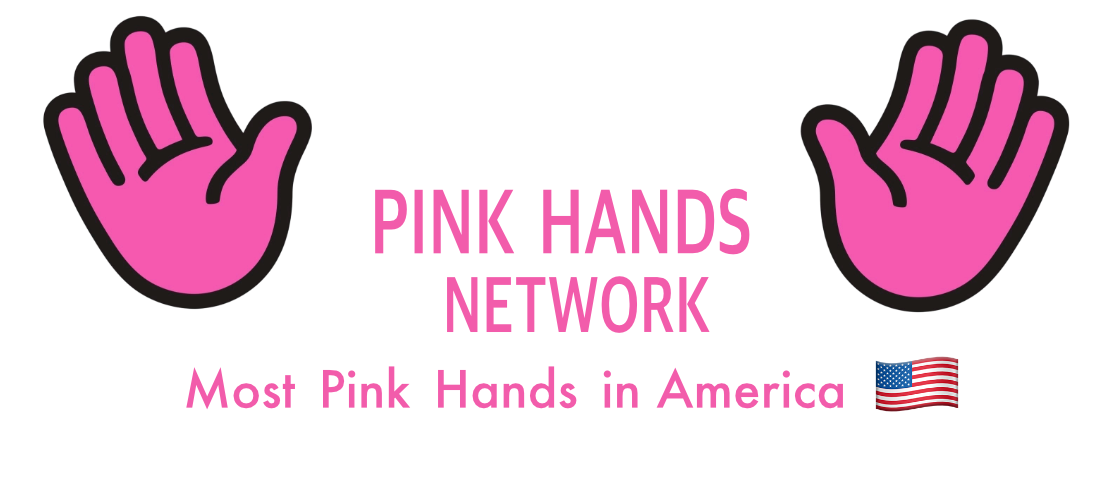

In [2]:
from IPython.display import Image
Image('https://i.ibb.co/zZswY34/Pink-hands-network-2.png')

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# EDA, Exploratory Data Analysis

## import libraries

In [3]:
print('Hello, Sentiment Analysis')

Hello, Sentiment Analysis


In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Control group

In [5]:
input_data_df = pd.read_csv("https://raw.githubusercontent.com/anumit-web/ML-Analytics-Portfolio-2024/refs/heads/main/6.%20Sentiment%20Analysis/dataset/sentiment_analysis.csv",sep=",")

Goal analyze the result of AB testing for marketing campaign or website feature.

In [6]:
input_data_df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [7]:
input_data_df.tail()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter
498,2019,3,25,morning,"actually, I wish I was back in Tahoe. I miss...",negative,Instagram


In [8]:
input_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           499 non-null    int64 
 1   Month          499 non-null    int64 
 2   Day            499 non-null    int64 
 3   Time of Tweet  499 non-null    object
 4   text           499 non-null    object
 5   sentiment      499 non-null    object
 6   Platform       499 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.4+ KB


In [9]:
input_data_df.describe()


,Year,Month,Day
count,499.000000,499.000000,499.000000
mean,2020.394790,6.084168,15.693387
std,2.830991,3.652711,8.804673
min,2010.000000,1.000000,1.000000
25%,2019.000000,2.000000,8.000000
50%,2021.000000,6.000000,15.000000
75%,2023.000000,9.000000,22.000000
max,2023.000000,12.000000,31.000000


print column names

In [10]:
print(input_data_df.columns)

Index(['Year', 'Month', 'Day', 'Time of Tweet', 'text', 'sentiment',
       'Platform'],
      dtype='object')


In [11]:
# Get all Column Header Labels as List
for column_headers in  input_data_df.columns:
    print(column_headers)

Year
Month
Day
Time of Tweet
text
sentiment
Platform


## find list of all columns which have null values
using SKIMPY

In [12]:
# Get the count of null values in each column
null_counts = input_data_df.isnull().sum()
print(null_counts)

Year             0
Month            0
Day              0
Time of Tweet    0
text             0
sentiment        0
Platform         0
dtype: int64


In [13]:
try:
  import skimpy
except:
  !pip install skimpy
  import skimpy

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 42.0 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: polars
    Found existing installation: polars 1.6.0
    Uninstalling polars-1.6.0:
      Successfully uninstalled polars-1.6.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykern

In [14]:
# ! pip install skimpy

In [15]:
from skimpy import skim

In [16]:
skim(input_data_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 499    │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 7      │ │ int64       │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA   ┃ NA %   ┃ mean     ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Year            │    0 │      0 │     2020 │   2.831 │   2010 │   2019 │   2021 │   2023 │  2023 │   ▁▂▃▇  │  │
│ │ Month           │    0 │      0 │    6.084 │   3.653 │      1 │      2 │      6 │      9 │    12 │ ▇▅▅▅▅▅  │  │
│ │ Day             │    0 │      0 │    15.69 │   8.805 │      1 │      8 │     15 │     22 │    31 │ ▇▇▇▇▅▇  │  │
│ └─────────────────┴──────┴────────┴──────────┴─────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Time of Tweet                │      0 │          0 │                           1 │                     499 │  │
│ │ text                         │      0 │          0 │                          12 │                    6096 │  │
│ │ sentiment                    │      0 │          0 │                           1 │                     499 │  │
│ │ Platform                     │      0 │          0 │                         3.2 │                    1580 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## find unique values by column names

In [17]:
# Find the number of unique values in both 'Name' and 'Age' columns
unique_values = input_data_df.nunique()
print(unique_values)

Year              14
Month             12
Day               31
Time of Tweet      3
text             394
sentiment          3
Platform           5
dtype: int64


In [18]:
try:
  import summarytools
except:
  !pip install summarytools
  import summarytools

In [19]:
# ! pip install summarytools

In [20]:
from summarytools import dfSummary

In [21]:
dfSummary(input_data_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Year[int64],Mean (sd) : 2020.4 (2.8)min < med < max:2010.0 < 2021.0 < 2023.0IQR (CV) : 4.0 (713.7),14 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACqUlEQVR4nO3dMW/aQBiH8fcgBCdYRoiKbFk6VurA6A/RD9uPkEgMnVk7saEgZBQ3CGPolK0EfIcb/63nt5ITDI/gvfikc8fj0YCm63z2BwAucfPZHwDt4Zy7M7Nbz+W74/H4dupFQsVVOOfuxuPxjyRJRj7rN5vN2jn381SshIpruU2SZJSm6dtwONxWWZhlWTSbzUar1erWzAgV9RsOh9vJZPLHY+ndRy+ymYIEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEru9pmMDb78zO3ICnilAbJPT2O7PzN+CpItRm8b79zuyyG/BUEWoDBdx+Z3bmBjxVbKYggVAhgVAhgVAhgVAhgVAhgVAhgf+jtkxZlj0zS5xzPssb+/iVUFskz/NeURTfHx8fu91ut/KTrSY/fiXUFtntdjdRFN1Pp9Ptw8PDusrapj9+JdQWGgwGXo9gy7JMzH9sSA6HQ89n4SUIFWYWPjYURRGVZfltu90+mZnvOYWTCPWEwHOhjd2UnBIyNpiZLRaL0Xw+v9/v9906Ph+h/kPoudAmb0rO8R0b1ut1rae2Whtq4DdiEsfxJE3TTdVzoVmWRc/Pz5PVavXFObep+r51znnKWhlq6Dfi+7zV7/efqn67hMx6dc95yloZqgWelA+Zt0JmvbrnPGVtDdXM/E/KX2Pe8pn16p7zlPGsHxIIFRLO/vQH7p47ZnbwXBuynt1zy3wYasjuuSzLXp7nX+M4/t3pdIr/uf599/zy8vKr6vuamb2+vkZmZnmeR8vl8l5hrfJ7Z1kWnfubv+6dQ5hQyQxBAAAAAElFTkSuQmCC"">",0(0.0%)
2,Month[int64],Mean (sd) : 6.1 (3.7)min < med < max:1.0 < 6.0 < 12.0IQR (CV) : 7.0 (1.7),12 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACrUlEQVR4nO3dP47aQBiH4W/CggwoRogIOl8gUgpKmtwgh02bLgVcYG9Ag5AQGEEWYf6kSppIAWbwen7W+9Rr72j1wpjB63HX69WA2H2oegDAPV5u/YBzrm1mLc/zH6/X65vnscBf/w3VOdceDAbf0jTt+5x8u92unXPfiRWhbr2jttI07U8mk7der3d45MR5nifT6bS/Wq1aZkaoCHJz6jcz6/V6h+Fw+Mvj/G2PY4B/8GEKEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEu765z7gHmU+A4JQ8RRlPwOCUPEspT4DglDxVGU9A4IPU5BAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJDAd/2RCbxVzqymWyYRakRCb5Uzq++WSYQaF+9b5czqvWUSoUYo4FY5s5pumUSoNXM+n5tmljrnfA6P9vqWUGtkv983i6L4kmVZo9FoPHzpEPP1LaHWyPF4fEmSpDMejw+j0Wj9yLGxX9+WGmrgNGRW4VSkvKt2t9ut3ZagpYUaOg2ZVTcVsat2fEoLNWQaMqt8KmJX7ciUfo0aMA2ZVTwVsat2PPiuHxIIFRKiXp5SXbwOGHd6uVyaJQxJXrShhq4abDabnXPuh5n5rDh4BxMy7qIokvP5/PlwOPw0M9/rem+BbwylvsiiDTVk1WCxWHyczWZfsyz75BN5SDAh457P5/3X19fO6XRqPDTgJwh9Yyj7RRZtqH/4rBqs1+t2yNLYM4LxHbfv7wsVupxY9oss+lBD+C6NVRlM1WL9m/GpHxIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRLu+go1z/Pk0RPvdrvEzGy/3yfL5bLznser/m7VcYcef09fvwGVvrbYv2fU0QAAAABJRU5ErkJggg=="">",0(0.0%)
3,Day[int64],Mean (sd) : 15.7 (8.8)min < med < max:1.0 < 15.0 < 31.0IQR (CV) : 14.0 (1.8),31 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC1ElEQVR4nO3cvW4aQRRA4TvBWINRdsSP7I4XsJQCyY2bdCnzsGnTpbCl1LwBDbJkrUEQI9bLpoljRTKGnWHCXHO+Fg1scWR2hrs2VVUJkLoPh74AYBcnh74AvB/GmJaInHouX1VV9bjpRULFXhhjWr1e72uWZR2f9bPZLDfGfNsUK6FiX06zLOtcX18/OueWdRZOp1N7c3PTub+/PxURQkV8zrnl+fn5L4+lrbdeZDMFFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKjAUEoEMecyjxWhbhAQm+12u1+cc22fz902l3msCPUVIUPARVFYEbm8urr62e/3Z3XW7jKXeawI9XXeQ8Dj8bgzGo3OrLVFjLnMY/VuQw28T8zW63XTOZfXjS3Pc0KLYGuoGjcGoc/vFEVhy7K8XC6XP0TE568i9uzNUGM/sBWR91e3yMvX99PTUyPGxaG+bX9Roz6wFZvv8zt8fadnp3vUWA9sAbvilymoQKhQgVChAqFChagH/mVZNkUkM8b4vgUDGhCRiKEuFotmURSfBoNBo9Fo1D7LFGFAAy+ihbparU6stWfD4XB5cXGR112fwjks0hH9t/52u+17BivCOSz+SHooJeAeN1uv180Il4QDSTbUkHtczUMlbEBfl2yoIfe4WodK9rEBfXh4mBtjvouIz/pkI0821Gc+97hah0pCN6CTyeTj7e3t58Fg0PcJPeVTluRDPUa+G9A8z1u+oad+ykKo71DASUuy30SEir8CN3JRT1oIFSISvpGLfdJCqBCR8I1c7JMWQsU/QjZyMa7nGWN+UIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqLDTP6CYTqe27hvP53MrIrJYLOzd3d3Z/1yv9bO1Xnfo+l36+g0jtp7DeaunpQAAAABJRU5ErkJggg=="">",0(0.0%)
4,Time of Tweet[object],1. morning2. noon3. night,171 (34.3%)167 (33.5%

# Data Processing

In [22]:
# print
input_data_df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


# Data Visualization 📊📈📉

## find number of sentiments in dataset

In [23]:
pie_data_df = input_data_df.groupby('sentiment').count().reset_index()

# print
pie_data_df

,sentiment,Year,Month,Day,Time of Tweet,text,Platform
0,negative,134,134,134,134,134,134
1,neutral,199,199,199,199,199,199
2,positive,166,166,166,166,166,166


In [24]:
columns = ['sentiment', 'count']

pie_data_df = pie_data_df.filter(['sentiment', 'Year'])

#print
pie_data_df

columns = ['sentiment', 'count']

pie_data_df

,sentiment,Year
0,negative,134
1,neutral,199
2,positive,166


In [25]:
columns = ['sentiment', 'count']

pie_data_df.columns = columns

# print
pie_data_df.head()

,sentiment,count
0,negative,134
1,neutral,199
2,positive,166


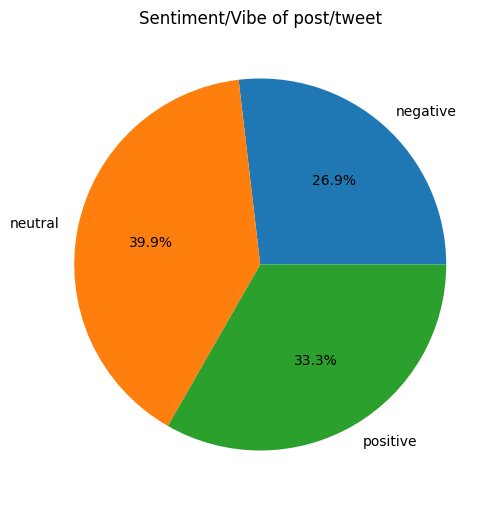

In [26]:

# Create a pie chart
plt.figure(figsize=(6, 8))
plt.pie(pie_data_df['count'], labels=pie_data_df['sentiment'], autopct='%1.1f%%')
plt.title('Sentiment/Vibe of post/tweet')
plt.show()

## find average number of letters or alphabets in a tweet categorized by sentiment type

## Change column names

## fill mean average values in rows and columns

In [27]:
#

# add a coulmns

input_data_df["total_alphabets"] = 0

input_data_df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform,total_alphabets
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter,0
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook,0
2,2017,8,18,night,Don't angry me,negative,Facebook,0
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook,0
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram,0


In [28]:
input_data_df["total_alphabets"] = input_data_df["text"].apply(len)

input_data_df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform,total_alphabets
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter,37
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook,46
2,2017,8,18,night,Don't angry me,negative,Facebook,14
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook,84
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram,33


In [29]:
bar_chart_data_df = input_data_df.filter(['sentiment', 'total_alphabets'])

# print
bar_chart_data_df.head()

,sentiment,total_alphabets
0,positive,37
1,positive,46
2,negative,14
3,negative,84
4,negative,33


In [30]:
bar_chart_data_df = bar_chart_data_df.groupby('sentiment')['total_alphabets'].mean().reset_index()

# print
bar_chart_data_df.head()

,sentiment,total_alphabets
0,negative,63.000000
1,neutral,56.311558
2,positive,61.500000


In [31]:
columns = ['sentiment', 'average_alphabets']

bar_chart_data_df.columns = columns

# print
bar_chart_data_df

,sentiment,average_alphabets
0,negative,63.000000
1,neutral,56.311558
2,positive,61.500000


<ipython-input-32-2990eb1be9cf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='average_alphabets', data=bar_chart_data_df, palette=colors)


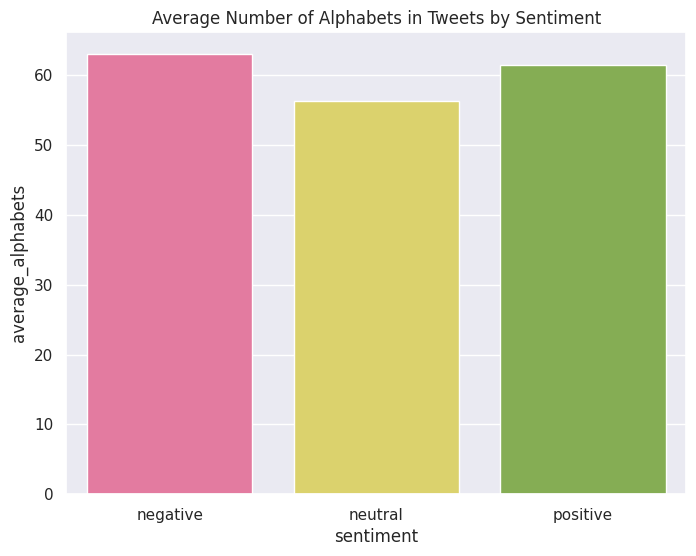

In [32]:
sns.set()
plt.figure(figsize=(8, 6))
colors = ['#f46a9b', '#ede15b', '#87bc45']
sns.barplot(x='sentiment', y='average_alphabets', data=bar_chart_data_df, palette=colors)
plt.title('Average Number of Alphabets in Tweets by Sentiment')
plt.show()

# Data Calculations

## strategy
1. Lower case string
2. Tokenization
3. punctuation removal
4. Stop Words
5. Stemming
6. Lemmatization




Tokenization

In [33]:
input_data_df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform,total_alphabets
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter,37
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook,46
2,2017,8,18,night,Don't angry me,negative,Facebook,14
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook,84
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram,33


In [34]:
text_location = input_data_df.columns.get_loc('text')

# Create a new column 'Country'
input_data_df['text_processed'] = ""

# Insert the 'Country' column after the 'Name' column
input_data_df.insert(text_location + 1, 'text_processed', input_data_df.pop('text_processed'))

text_processed_location = input_data_df.columns.get_loc('text_processed')

# Create a new column 'Country'
input_data_df['text_processed_2'] = ""

# Insert the 'Country' column after the 'Name' column
input_data_df.insert(text_processed_location + 1, 'text_processed_2', input_data_df.pop('text_processed_2'))

text_processed_location_2 = input_data_df.columns.get_loc('text_processed_2')

# Create a new column 'Country'
input_data_df['text_processed_3'] = ""

# Insert the 'Country' column after the 'Name' column
input_data_df.insert(text_processed_location_2 + 1, 'text_processed_3', input_data_df.pop('text_processed_3'))


# print

input_data_df.head()

# print

input_data_df.head()

,Year,Month,Day,Time of Tweet,text,text_processed,text_processed_2,text_processed_3,sentiment,Platform,total_alphabets
0,2018,8,18,morning,What a great day!!! Looks like dream.,,,,positive,Twitter,37
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",,,,positive,Facebook,46
2,2017,8,18,night,Don't angry me,,,,negative,Facebook,14
3,2022,6,8,morning,We attend in the class just for listening teac...,,,,negative,Facebook,84
4,2022,6,8,noon,"Those who want to go, let them go",,,,negative,Instagram,33


## 1. Lower case string

In [35]:
input_data_df['text_processed'] = input_data_df['text'].str.lower()

input_data_df.head()

,Year,Month,Day,Time of Tweet,text,text_processed,text_processed_2,text_processed_3,sentiment,Platform,total_alphabets
0,2018,8,18,morning,What a great day!!! Looks like dream.,what a great day!!! looks like dream.,,,positive,Twitter,37
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach","i feel sorry, i miss you here in the sea beach",,,positive,Facebook,46
2,2017,8,18,night,Don't angry me,don't angry me,,,negative,Facebook,14
3,2022,6,8,morning,We attend in the class just for listening teac...,we attend in the class just for listening teac...,,,negative,Facebook,84
4,2022,6,8,noon,"Those who want to go, let them go","those who want to go, let them go",,,negative,Instagram,33


## 2. tokenize sentenses

In [36]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [37]:
from nltk.tokenize import word_tokenize

# Tokenize the 'text' column and put the result in a new column 'tokens'
input_data_df['text_processed'] = input_data_df['text_processed'].apply(word_tokenize)

input_data_df.head()

,Year,Month,Day,Time of Tweet,text,text_processed,text_processed_2,text_processed_3,sentiment,Platform,total_alphabets
0,2018,8,18,morning,What a great day!!! Looks like dream.,"[what, a, great, day, !, !, !, looks, like, dr...",,,positive,Twitter,37
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach","[i, feel, sorry, ,, i, miss, you, here, in, th...",,,positive,Facebook,46
2,2017,8,18,night,Don't angry me,"[do, n't, angry, me]",,,negative,Facebook,14
3,2022,6,8,morning,We attend in the class just for listening teac...,"[we, attend, in, the, class, just, for, listen...",,,negative,Facebook,84
4,2022,6,8,noon,"Those who want to go, let them go","[those, who, want, to, go, ,, let, them, go]",,,negative,Instagram,33


## punctuation removal

In [38]:

input_data_df['text_processed_2'] = input_data_df['text_processed'].copy()

input_data_df.head()



,Year,Month,Day,Time of Tweet,text,text_processed,text_processed_2,text_processed_3,sentiment,Platform,total_alphabets
0,2018,8,18,morning,What a great day!!! Looks like dream.,"[what, a, great, day, !, !, !, looks, like, dr...","[what, a, great, day, !, !, !, looks, like, dr...",,positive,Twitter,37
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach","[i, feel, sorry, ,, i, miss, you, here, in, th...","[i, feel, sorry, ,, i, miss, you, here, in, th...",,positive,Facebook,46
2,2017,8,18,night,Don't angry me,"[do, n't, angry, me]","[do, n't, angry, me]",,negative,Facebook,14
3,2022,6,8,morning,We attend in the class just for listening teac...,"[we, attend, in, the, class, just, for, listen...","[we, attend, in, the, class, just, for, listen...",,negative,Facebook,84
4,2022,6,8,noon,"Those who want to go, let them go","[those, who, want, to, go, ,, let, them, go]","[those, who, want, to, go, ,, let, them, go]",,negative,Instagram,33


In [39]:
input_data_df.loc[:, 'text_processed_3'] = input_data_df.loc[:, 'text_processed_2']

input_data_df.head()

,Year,Month,Day,Time of Tweet,text,text_processed,text_processed_2,text_processed_3,sentiment,Platform,total_alphabets
0,2018,8,18,morning,What a great day!!! Looks like dream.,"[what, a, great, day, !, !, !, looks, like, dr...","[what, a, great, day, !, !, !, looks, like, dr...","[what, a, great, day, !, !, !, looks, like, dr...",positive,Twitter,37
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach","[i, feel, sorry, ,, i, miss, you, here, in, th...","[i, feel, sorry, ,, i, miss, you, here, in, th...","[i, feel, sorry, ,, i, miss, you, here, in, th...",positive,Facebook,46
2,2017,8,18,night,Don't angry me,"[do, n't, angry, me]","[do, n't, angry, me]","[do, n't, angry, me]",negative,Facebook,14
3,2022,6,8,morning,We attend in the class just for listening teac...,"[we, attend, in, the, class, just, for, listen...","[we, attend, in, the, class, just, for, listen...","[we, attend, in, the, class, just, for, listen...",negative,Facebook,84
4,2022,6,8,noon,"Those who want to go, let them go","[those, who, want, to, go, ,, let, them, go]","[those, who, want, to, go, ,, let, them, go]","[those, who, want, to, go, ,, let, them, go]",negative,Instagram,33


In [40]:
import string

# input_data_df['text_processed_2'] = input_data_df['text_processed'].copy()

def remove_punctuation(tokens):

  for word in tokens:
    if (word in string.punctuation):
      tokens.remove(word)

  return tokens
  # return ""

# input_data_df['text_processed_2'] = input_data_df['text_processed']
input_data_df['text_processed_3'] = input_data_df['text_processed_3'].apply(remove_punctuation)

input_data_df.head(5)

# input_data_df['text', 'text_processed'].head()

,Year,Month,Day,Time of Tweet,text,text_processed,text_processed_2,text_processed_3,sentiment,Platform,total_alphabets
0,2018,8,18,morning,What a great day!!! Looks like dream.,"[what, a, great, day, !, looks, like, dream]","[what, a, great, day, !, looks, like, dream]","[what, a, great, day, !, looks, like, dream]",positive,Twitter,37
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach","[i, feel, sorry, i, miss, you, here, in, the, ...","[i, feel, sorry, i, miss, you, here, in, the, ...","[i, feel, sorry, i, miss, you, here, in, the, ...",positive,Facebook,46
2,2017,8,18,night,Don't angry me,"[do, n't, angry, me]","[do, n't, angry, me]","[do, n't, angry, me]",negative,Facebook,14
3,2022,6,8,morning,We attend in the class just for listening teac...,"[we, attend, in, the, class, just, for, listen...","[we, attend, in, the, class, just, for, listen...","[we, attend, in, the, class, just, for, listen...",negative,Facebook,84
4,2022,6,8,noon,"Those who want to go, let them go","[those, who, want, to, go, let, them, go]","[those, who, want, to, go, let, them, go]","[those, who, want, to, go, let, them, go]",negative,Instagram,33


## stop words removal

In [41]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [42]:

def remove_stop_words(tokens):

  tokens2 = []
  for word in tokens:
    #if (word in stopwords.words('english')):
       #tokens.remove(word)
    if ( word not in stopwords.words('english')):
         tokens2.append(word)

  #return tokens
  return tokens2

input_data_df['text_processed_3'] = input_data_df['text_processed_3'].apply(remove_stop_words)

input_data_df.head()

,Year,Month,Day,Time of Tweet,text,text_processed,text_processed_2,text_processed_3,sentiment,Platform,total_alphabets
0,2018,8,18,morning,What a great day!!! Looks like dream.,"[a, great, day, !, looks, like, dream]","[a, great, day, !, looks, like, dream]","[great, day, !, looks, like, dream]",positive,Twitter,37
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach","[feel, sorry, miss, here, the, sea, beach]","[feel, sorry, miss, here, the, sea, beach]","[sorry, sea, beach]",positive,Facebook,46
2,2017,8,18,night,Don't angry me,"[n't, angry]","[n't, angry]",[angry],negative,Facebook,14
3,2022,6,8,morning,We attend in the class just for listening teac...,"[attend, the, class, for, listening, teachers,...","[attend, the, class, for, listening, teachers,...","[class, listening, teachers, reading]",negative,Facebook,84
4,2022,6,8,noon,"Those who want to go, let them go","[who, want, go, let, go]","[who, want, go, let, go]","[want, let]",negative,Instagram,33


## 5. stemming

In [43]:
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [44]:
porter_stemmer = PorterStemmer()
snowball_stemmer = SnowballStemmer("english") # use this algorithm as it is new version of porter

def stemwords_in_sentence(tokens):
  stemmed_words = []
  for word in tokens:
      stemmed_word = snowball_stemmer.stem(word)
      stemmed_words.append(stemmed_word)


  return stemmed_words

input_data_df['text_processed_3'] = input_data_df['text_processed_3'].apply(stemwords_in_sentence)

input_data_df.head()

,Year,Month,Day,Time of Tweet,text,text_processed,text_processed_2,text_processed_3,sentiment,Platform,total_alphabets
0,2018,8,18,morning,What a great day!!! Looks like dream.,"[a, great, day, !, looks, like, dream]","[a, great, day, !, looks, like, dream]","[great, day, !, look, like, dream]",positive,Twitter,37
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach","[feel, sorry, miss, here, the, sea, beach]","[feel, sorry, miss, here, the, sea, beach]","[sorri, sea, beach]",positive,Facebook,46
2,2017,8,18,night,Don't angry me,"[n't, angry]","[n't, angry]",[angri],negative,Facebook,14
3,2022,6,8,morning,We attend in the class just for listening teac...,"[attend, the, class, for, listening, teachers,...","[attend, the, class, for, listening, teachers,...","[class, listen, teacher, read]",negative,Facebook,84
4,2022,6,8,noon,"Those who want to go, let them go","[who, want, go, let, go]","[who, want, go, let, go]","[want, let]",negative,Instagram,33


## Change column names

## fill mean average values in rows and columns

## Process combined data from control group and test group

# Data Calculations

CTR (Click-Through Rate)

CTR = (Number of Clicks / Number of Impressions) x 100

Conversion Rate

Conversion Rate = (Number of Conversions / Number of Visitors) x 100

add new columns
normalized = value between 0 and 1
percent = value between 0 and 100

In [45]:
combined_data_df['CTR_Normalized'] = 0
combined_data_df['CTR_Percent'] = 0
combined_data_df['CR_Normalized'] = 0
combined_data_df['CR_Percent'] = 0

#print
combined_data_df.head()

NameError: name 'combined_data_df' is not defined

In [ ]:
combined_data_df['CTR_Normalized'] = (combined_data_df['Clicks'] /
                      combined_data_df['Impressions'])

combined_data_df['CTR_Percent'] = (combined_data_df['Clicks'] /
                      combined_data_df['Impressions']) * 100

# print
combined_data_df.head()

In [ ]:
combined_data_df['CR_Normalized'] = (combined_data_df['Purchases'] /
                      combined_data_df['Clicks'])

combined_data_df['CR_Percent'] = (combined_data_df['Purchases'] /
                      combined_data_df['Clicks']) * 100


#print
combined_data_df.head()

In [ ]:
#CTR

temp_df1 = combined_data_df.groupby('Campaign Name')['CTR_Normalized'].mean()


In [ ]:
temp_df2 = combined_data_df.groupby('Campaign Name')['CR_Normalized'].mean()

In [ ]:
temp_df3 = combined_data_df.groupby('Campaign Name')['CTR_Percent'].mean()

In [ ]:
temp_df4 = combined_data_df.groupby('Campaign Name')['CR_Percent'].mean()

In [ ]:
temp_df5 = pd.merge(temp_df1, temp_df2, on='Campaign Name')

#print
temp_df5

In [ ]:
temp_df6 = pd.merge(temp_df3, temp_df4, on='Campaign Name')

In [ ]:
temp_df7 = pd.merge(temp_df5, temp_df6, on='Campaign Name')

# print
temp_df7

In [ ]:
calculations_df = temp_df7

# print
temp_df7

seperator

seperator

# Visualization

## CTR , Click through rate

### Bar chart of CTR

In [ ]:
colors = sns.color_palette(['#06C', '#F4B678'])

sns.barplot(data=calculations_df, x='Campaign Name',
                    y='CTR_Percent', hue='Campaign Name', palette = colors, dodge=False)
plt.title('Average Metrics of CTR')
plt.show()

### Box chart of CTR

In [ ]:
colors = sns.color_palette(['#73C5C5', '#A30000'])

sns.boxplot(x='Campaign Name', y='CTR_Normalized', data=combined_data_df,
            hue='Campaign Name', dodge=False, palette = colors)
plt.title('CTR Distribution by Campaign')
plt.show()

### Violin chart of CTR

In [ ]:
colors = sns.color_palette(['#7CC674', '#F0AB00'])

sns.violinplot(x='Campaign Name', y='CTR_Normalized', data=combined_data_df,
            hue='Campaign Name', dodge=False, palette = colors)
plt.title('CTR Distribution by Campaign')
plt.show()

## CR, Conversion rate

### Bar chart of CR

In [ ]:
colors = sns.color_palette(['#06C', '#F4B678'])

sns.barplot(data=calculations_df, x='Campaign Name',
                    y='CR_Percent', hue='Campaign Name', palette = colors, dodge=False)
plt.title('Average Metrics of CR')
plt.show()

### Box chart of CR

In [ ]:
colors = sns.color_palette(['#73C5C5', '#A30000'])

sns.boxplot(x='Campaign Name', y='CR_Normalized', data=combined_data_df,
            hue='Campaign Name', palette = colors, dodge=False)
plt.title('CR Distribution by Campaign')
plt.show()

### Violin chart of CR

In [ ]:
colors = sns.color_palette(['#7CC674', '#F0AB00'])

sns.violinplot(x='Campaign Name', y='CR_Normalized', data=combined_data_df,
            hue='Campaign Name', palette = colors, dodge=False)
plt.title('CR Distribution by Campaign')
plt.show()

# Analysis and Conclusions

**CTR (Click-Through Rate):**

Visual Observation: The histogram for CTR shows a higher mean for the Test Campaign compared to the Control Campaign.
The KDE line for the Test Campaign is consistently above that of the Control Campaign.
There are more outliers on the right for the Test Campaign than for the Control Campaign.
Conclusion: The Test Campaign has a higher CTR, indicating better engagement.



**CR (Conversion Rate):**

Visual Observation: The histogram for CR shows similar means for both Control and Test Campaigns, with the Test Campaign
having a slightly lower mean. The KDE lines overlap considerably, indicating similar distributions.
Conclusion: There is no significant difference in CR between the Control and Test Campaigns.

# The End 🛑